<a href="https://colab.research.google.com/github/Bananac0d3/CRC_test/blob/main/Model_yachida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [4]:
microbiome_data = pd.read_csv('/content/genera.counts.tsv',delimiter='\t')
print(microbiome_data.head())


   Age        BMI       Stage  \
0   57  26.880952  Stage_I_II   
1   65  26.562500     Healthy   
2   40  25.000000     Healthy   
3   67  20.173253     Healthy   
4   77  24.464602     Healthy   

   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Firm-18;g__UBA1775  \
0                                                  0                                 
1                                                  0                                 
2                                                  0                                 
3                                                  0                                 
4                                                  0                                 

   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A  \
0                                                 47                                                           
1                                                162        

In [5]:
X = microbiome_data.drop(columns=['Stage'])  # Drop non-feature columns
y = microbiome_data['Stage']  # Target variable

In [ ]:
print(microbiome_data.shape)

(346, 11943)


In [6]:
microbiome_data['Stage'] = microbiome_data['Stage'].apply(lambda x: 0 if x == 'Healthy' else 1)

scaler = StandardScaler()
microbiome_data_scaled = scaler.fit_transform(microbiome_data)

In [7]:
stage = microbiome_data['Stage'].values
print(stage)
full_data = pd.DataFrame(microbiome_data_scaled, columns=microbiome_data.columns)
full_data['Stage'] = stage
print(full_data.head())

[1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 0 1]
        Age       BMI  Stage  \
0 -0.605229  1.209710      1   
1  0.173968  1.109950      0   
2 -2.261022  0.620475      0   
3  0.368767 -0.891571      0   
4  1.342763  0.452754      0   

   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Firm-18;g__UBA1775  \
0                 

In [8]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    full_data.drop('Stage', axis=1),  # Features
    full_data['Stage'],  # Target
    test_size=0.2, random_state=42
)

In [9]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)
print(model.coef_)

[[-0.03930294  0.00537683  0.00678516 ...  0.          0.
   0.0092086 ]]


In [10]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5857


Confusion Matrix:
[[ 4 21]
 [ 8 37]]
AUC: 0.5396


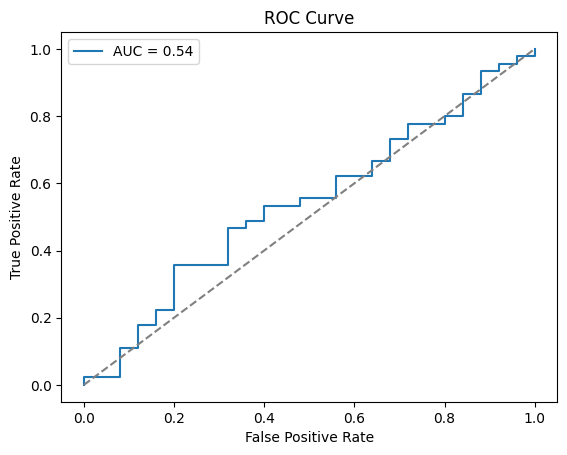

In [11]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# ROC Curve and AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc_score:.4f}')

# Plot ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegressionCV
lasso_model = LogisticRegressionCV(
    Cs=10, penalty='l1', solver='saga', max_iter=10000, cv=5, random_state=42
)

lasso_model.fit(X_train, y_train)
selected_features = np.where(lasso_model.coef_ != 0)[1]
print(f'Selected Features: {selected_features}')

Selected Features: [    0     3     4 ... 11939 11940 11943]


In [15]:
selected_feature_names = X_train.columns[selected_features]
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

print(f"Selected features: {selected_feature_names}")

Selected features: Index(['Age',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A',
       'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Oceaniglobus',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__CAG-448',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Alteromonadaceae;g__Idiomarina',
       'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__NS11-12g;f__UKL13-3;g__B1',
       'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Caulobacterales;f__Parvularculaceae;g__Parvularcula',
       'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__B39-G9;g__JAADFW01',
       'd__Bacteria;p__Cyanobacteria;c__Vampirovibrionia;o__Gastranaerophilales;f__Gastranaerophilaceae;g__Zag111',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Gilliamel

In [17]:
final_model = LogisticRegression(solver='saga', penalty='l1', max_iter=10000)
final_model.fit(X_train_selected, y_train)

LogisticRegression(max_iter=10000, penalty='l1', solver='saga')

Accuracy: 0.5714285714285714
Confusion Matrix:
[[ 3 22]
 [ 8 37]]
AUC: 0.5733


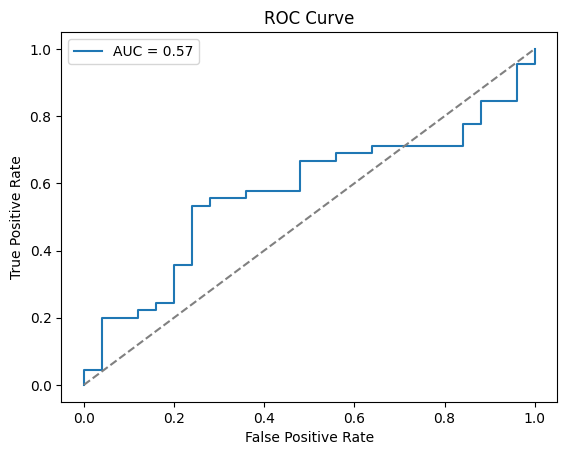

In [22]:
y_pred = final_model.predict(X_test_selected)
y_prob = final_model.predict_proba(X_test_selected)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, final_model.predict_proba(X_test_selected)[:, 1])
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# ROC Curve and AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc_score:.4f}')

# Plot ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()